# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here

#del df['Id']

df.drop(['Id'], axis='columns', inplace=True)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# your code here

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

missing_value_df.head(10)


,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# your code here

columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

df.drop(columns_to_drop, axis=1, inplace=True)

len(df.columns)

75

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

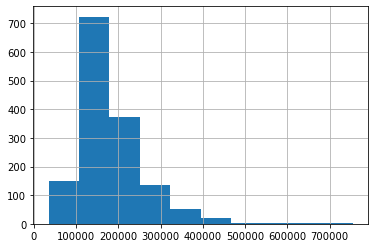

In [6]:
# your code here

df['SalePrice'].hist()

plt.show()

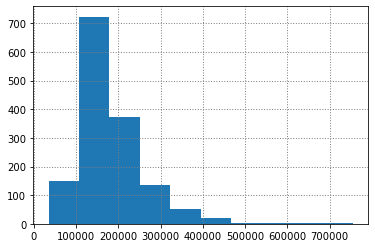

In [7]:
plt.hist(df['SalePrice'], histtype='stepfilled')
plt.grid(color='grey', linestyle=':', linewidth=1)

plt.show()

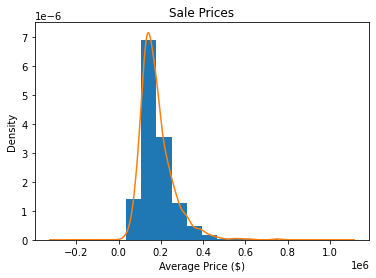

In [8]:
fig, ax = plt.subplots(figsize = (6,4))

# Plots #
    # Plot histogram
df['SalePrice'].plot(kind = "hist", density = True) # change density to true, because KDE uses density
    # Plot KDE
df['SalePrice'].plot(kind = "kde")

# X #
ax.set_xlabel("Average Price ($)")

# Y #
#ax.set_ylim(0, 1)

# Overall #
ax.set_title("Sale Prices")

plt.show()

#### "Take Your Histograms to the Next Level Using Matplotlib"

##### https://towardsdatascience.com/take-your-histograms-to-the-next-level-using-matplotlib-5f093ad7b9d3

##### https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

##### https://realpython.com/python-histograms/

/Users/manuelaquino/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


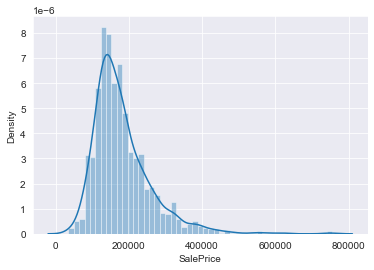

In [9]:
sns.set_style('darkgrid')
sns.distplot(df['SalePrice'])

plt.show()

In [10]:
df['SalePrice'].skew()

1.8828757597682129

In [11]:
# your comment here

#It's not a normal distribution. Sale prices are more concentrated to the left or lower values overall and the tail is longer to the right.

#When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

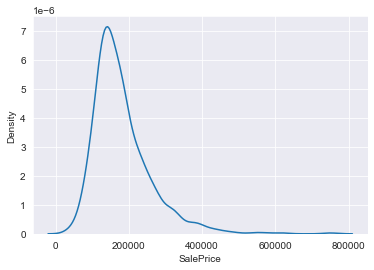

In [12]:
# Plotting the KDE Plot
sns.kdeplot(data=df, x=df['SalePrice'])

plt.show()

/Users/manuelaquino/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


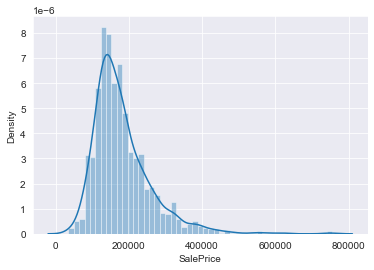

In [13]:
sns.distplot(df['SalePrice'])

plt.show()

#### https://pythontic.com/pandas/dataframe-computations/skew

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

In [14]:
# your code here
#Log Transform

salesprice_log = np.log(df['SalePrice'])

salesprice_log.skew()

0.12133506220520406

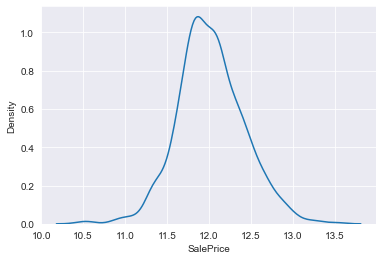

In [15]:
sns.kdeplot(data=df, x=np.log(df['SalePrice']))

plt.show()

In [16]:
#Square Root Transform

salesprice_sqrt = np.sqrt(df['SalePrice'])

salesprice_sqrt.skew()

0.9431527373310963

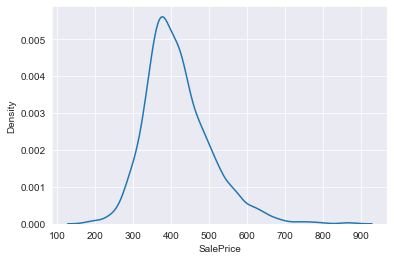

In [17]:
sns.kdeplot(data=df, x=np.sqrt(df['SalePrice']))

plt.show()

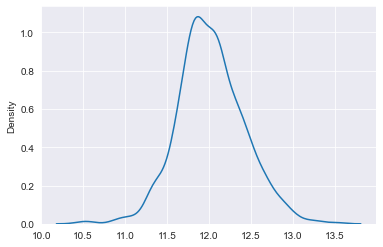

In [18]:
#Power Transform (Box-Cox)

from scipy.stats import boxcox

salesprice_boxcox = boxcox(df['SalePrice'], 0)

sns.kdeplot(data=df, x=salesprice_boxcox)

plt.show()


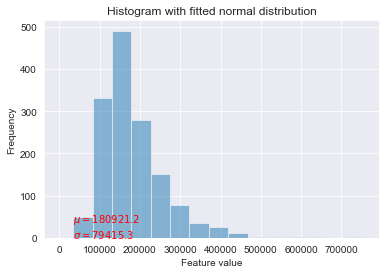

In [19]:
import scipy.stats as stats

param = stats.norm.fit(df['SalePrice'])   # Fit a normal distribution to the data

x = np.linspace(0, 20, 100)      # Linear spacing of 100 elements between 0 and 20.
pdf_fitted = stats.norm.pdf(x, *param)    # Use the fitted paramters to create the y datapoints

# Plot the histogram again
df['SalePrice'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)

# Plot some fancy text to show us what the paramters of the distribution are (mean and standard deviation)
plt.text(x=np.min(df['SalePrice']), y=0.1, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1], color='r')

# Plot a line of the fitted distribution over the top
plt.plot(x, pdf_fitted, color='r')

# Standard plot stuff
plt.xlabel("Feature value")
plt.title("Histogram with fitted normal distribution")
plt.show()

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [20]:
# your code here
# add cells as needed

# I wanted to explore this variable first because I believe location/'Neighborhood' is super relevant for any House.
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

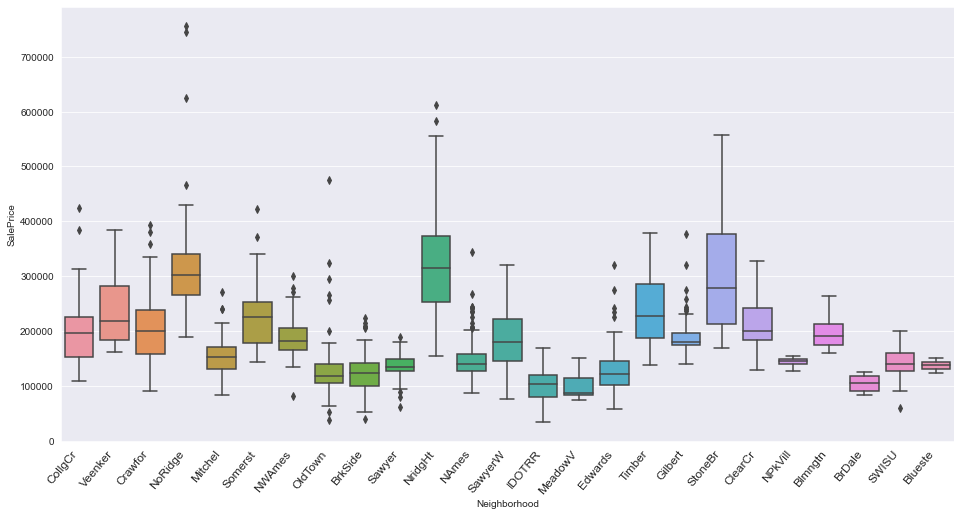

In [21]:
# https://drawingfromdata.com/
# https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

sns.set_style("whitegrid") 
  
ax = sns.boxplot(x = df['Neighborhood'], y = df['SalePrice'], data = df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, horizontalalignment='right', fontweight='light',
    fontsize='large')

plt.show()

By drawing each neighborhood box plot I believe it's easier to  identify some value patterns.

For example, "NoRidge", "NridgHt" and "StoneBr" have the higher medians, two of them show the higher outliers. Those areas have clearly higher value properties.

Conversely, the lower band is a little bit more crowded, but the graphic helps to identify the patterns for each one.  For example, in "IDOTRR" around 50% of the transactions closed below 100.000

##### I also thought Zoning Classifications was going to be relevant variable and decided to explore it. Down here there are just a few sources of information.

###### CityLab University: Zoning Codes

###### https://www.bloomberg.com/news/articles/2019-08-06/how-to-understand-municipal-zoning-codes

"""
Classifications (R1, etc.)
Also known as zoning categories or symbols, these letter-number combinations represent the nuts and bolts of 
what is and isn’t allowed on any given parcel in a city. There is no universal standard for zoning 
classifications, but many cities indicate the use with a letter or combination of letters (R for 
residential, C for commercial, and I for industrial, for instance), and the density or intensity of 
development with a number.
"""


In [22]:
# RL – Residential Low Density
# RM – Residential Medium Density
# RH – Residential High Density
# C - Commercial

df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

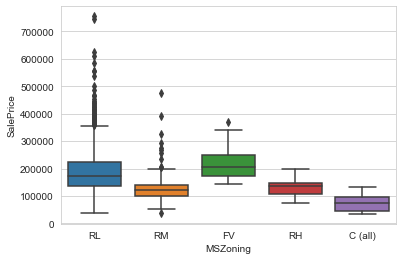

In [23]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = df['MSZoning'], y = df['SalePrice'], data = df, order =df['MSZoning'].value_counts().index)

plt.show()

In [24]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

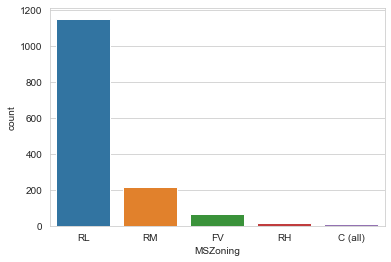

In [25]:
sns.countplot(x=df['MSZoning'], data=df, order = df['MSZoning'].value_counts().index)
    
plt.show()

In [26]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [31]:
df['TotalBaths'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']
df["Years_Since_RemodAdd"] = datetime.datetime.now().year - df["YearRemodAdd"]
df["Years_Since_Built"] = datetime.datetime.now().year - df["YearBuilt"]
df["Total_House_Size"] = df["GrLivArea"]+df["LotArea"]+df["GarageArea"]

df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBaths,Years_Since_RemodAdd,Years_Since_Built,Total_House_Size
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,4,18,18,10708
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,181500,3,45,45,11322
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,223500,4,19,20,13644
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,140000,2,51,106,11909
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,250000,4,21,21,17294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,8,2007,WD,Normal,175000,3,21,22,10024
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2010,WD,Normal,210000,3,33,43,15748
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2500,5,2010,WD,Normal,266500,2,15,80,11634
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,4,2010,WD,Normal,142125,2,25,71,11035


## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

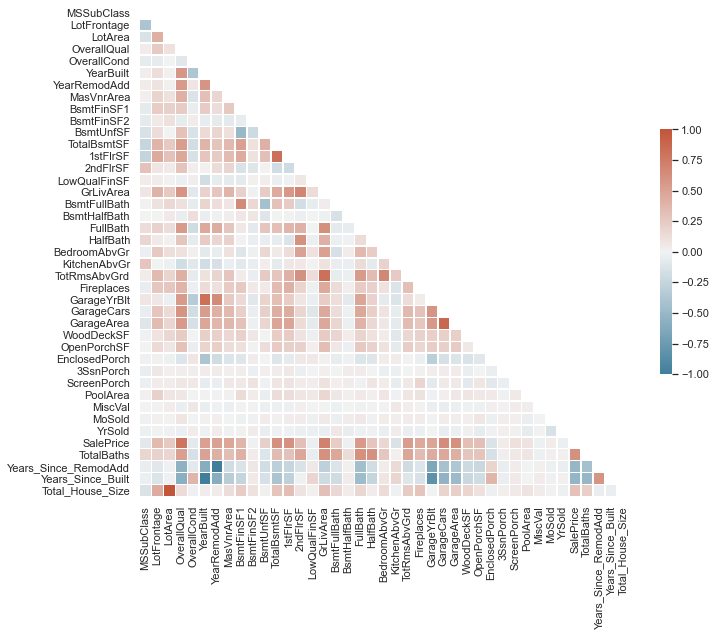

In [68]:
# your code here

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


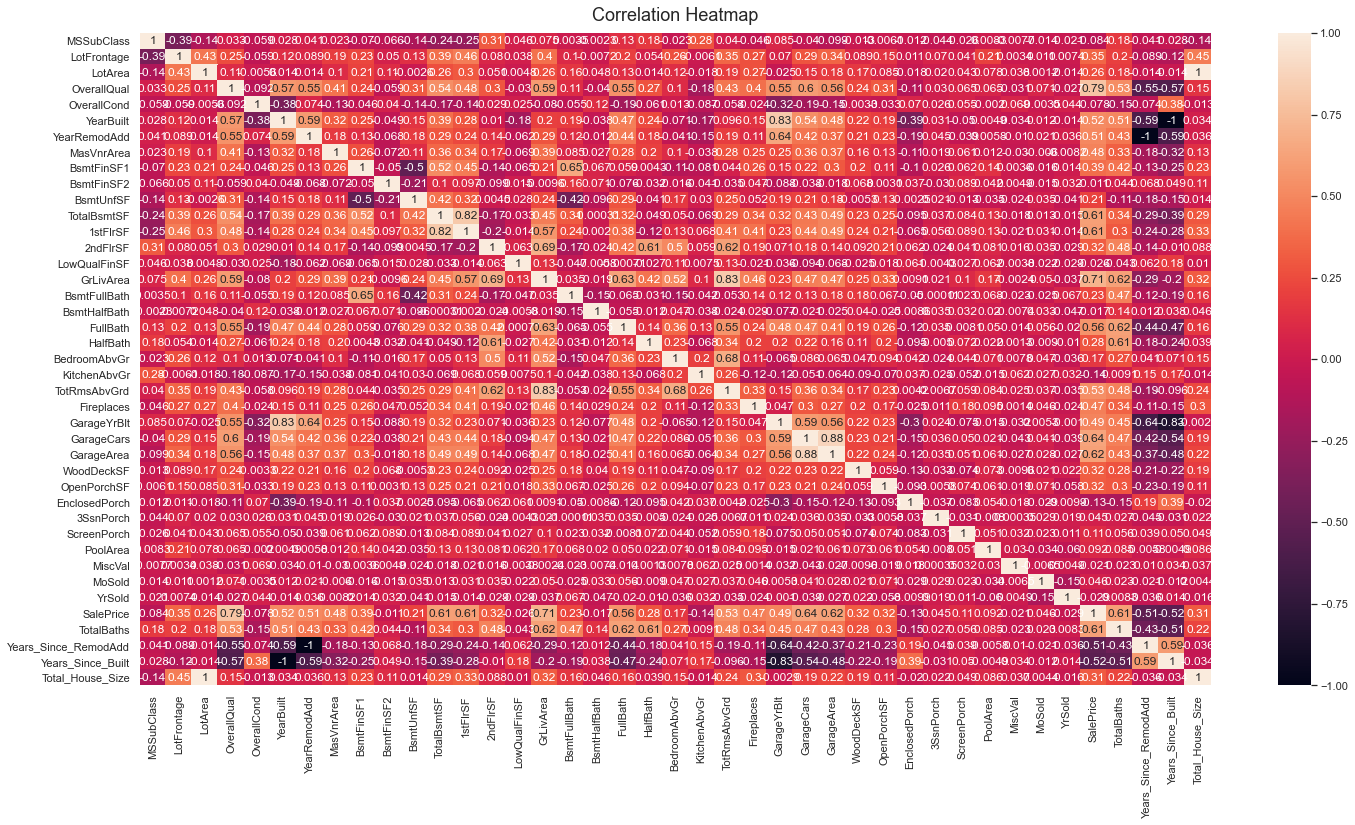

In [63]:
plt.figure(figsize=(24, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

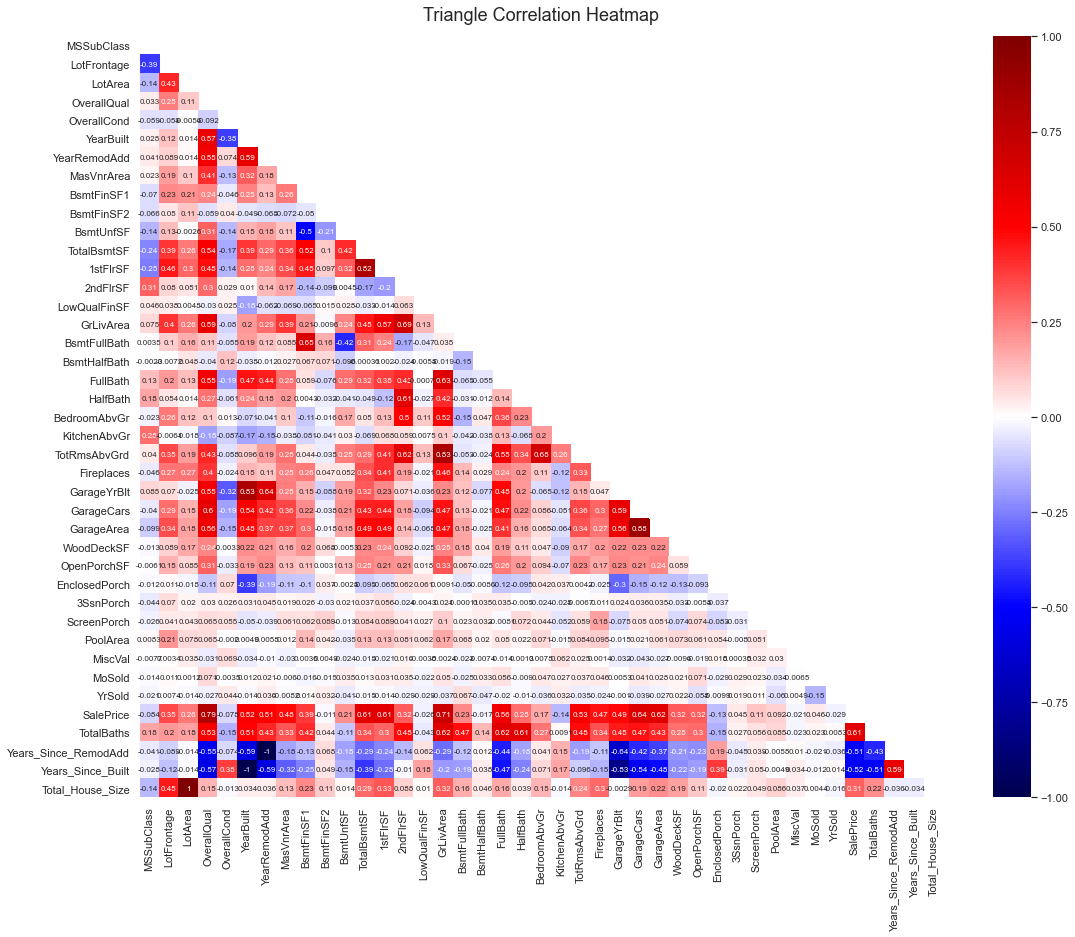

In [64]:
np.triu(np.ones_like(df.corr()))

plt.figure(figsize=(18, 14))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, annot_kws={"size":8}, cmap='seismic')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [69]:
# your comment here

# The following two variables have the highest correlation to the SalePrice:

#OverallQual: Overall material and finish quality
#GrLivArea: Above grade (ground) living area square feet

#In general, variables that are related to overall size of the property or a proxy to the full size will have higher correlations.

#For the total count/size related the columns we created, this holds true. TotalBaths & TotalHouseSize have positive correlation.  

#And lastly, for the columns that are related to age/time_elapsed. Older means less correlation and less SalesPrice value.


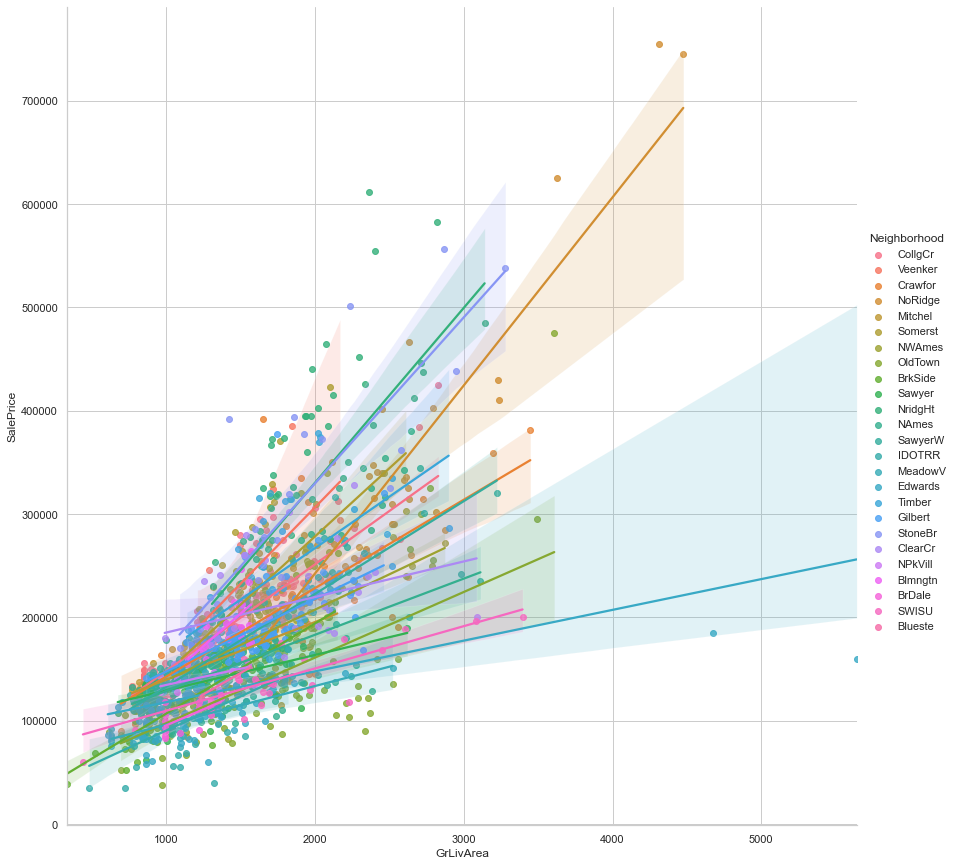

In [108]:
sns.lmplot(x="GrLivArea", y="SalePrice", hue="Neighborhood",
               data=df, height=12, aspect=1)
plt.show();

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [30]:
# your responses here
# add cells as needed

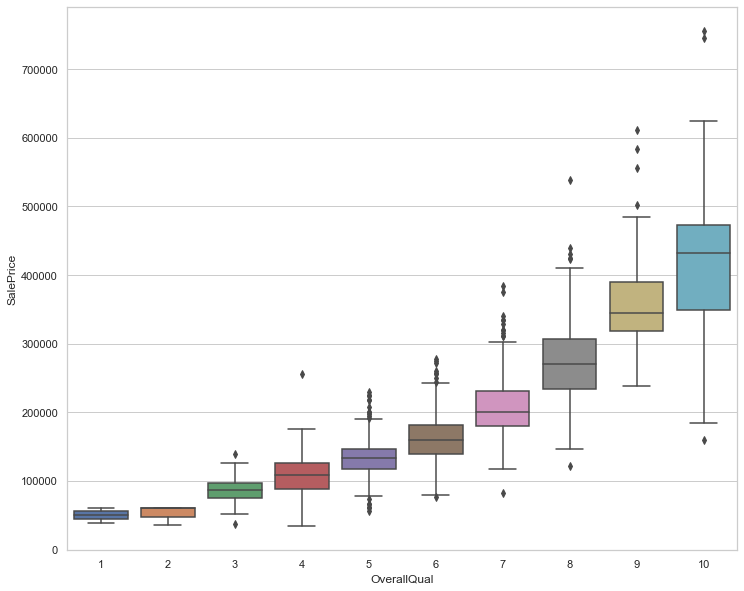

In [75]:
fig, ax= plt.subplots(figsize=(12,10))

sns.boxplot(x = df['OverallQual'], y = df['SalePrice'], data = df)

plt.show()

# #OverallQual: Overall material and finish quality of a property is extremely important for the asset.
# If an appraisal is made or a property is built to satisfy this criteria, this variable will be a good proxy for SalePrice or value.

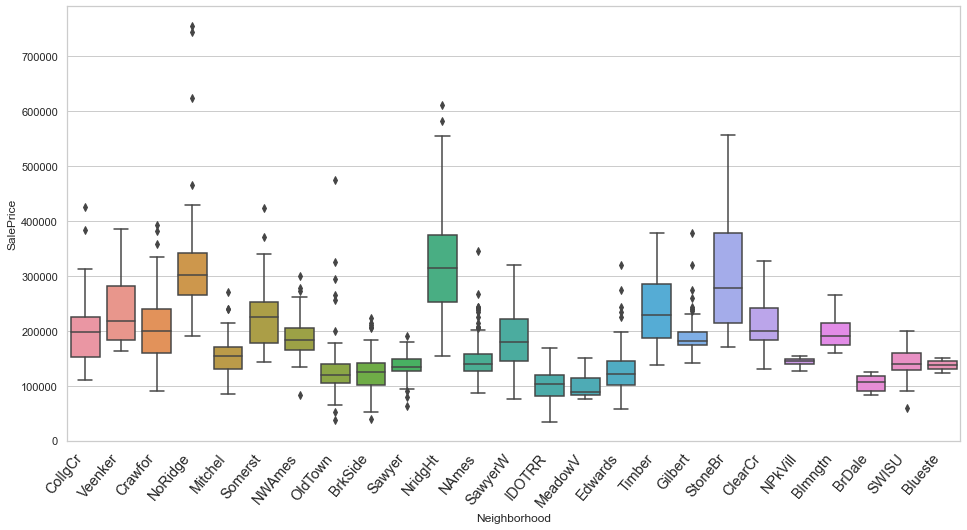

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

sns.set_style("whitegrid") 
  
ax = sns.boxplot(x = df['Neighborhood'], y = df['SalePrice'], data = df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, horizontalalignment='right', fontweight='light',
    fontsize='large')

plt.show()

# Location its also extremely important and a relevant factor to evaluate and compare Areas vs. SalesPrice.

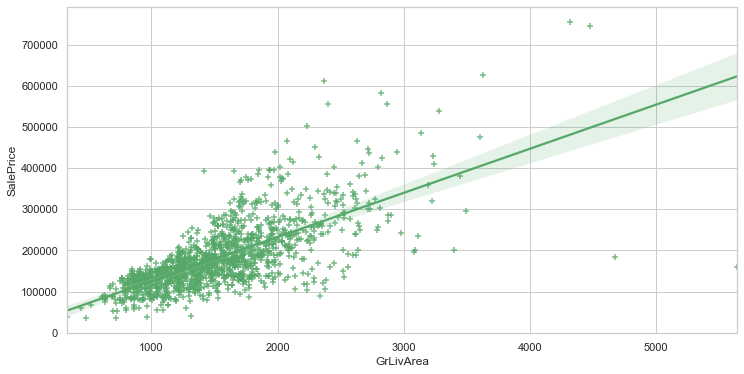

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
#sns.scatterplot(x = df["GrLivArea"], y = df["SalePrice"], data = df)
sns.regplot(x = df["GrLivArea"], y = df["SalePrice"], data = df, marker='+', color='g')
plt.show();

# Of course, the bigger the total area the higher the price.

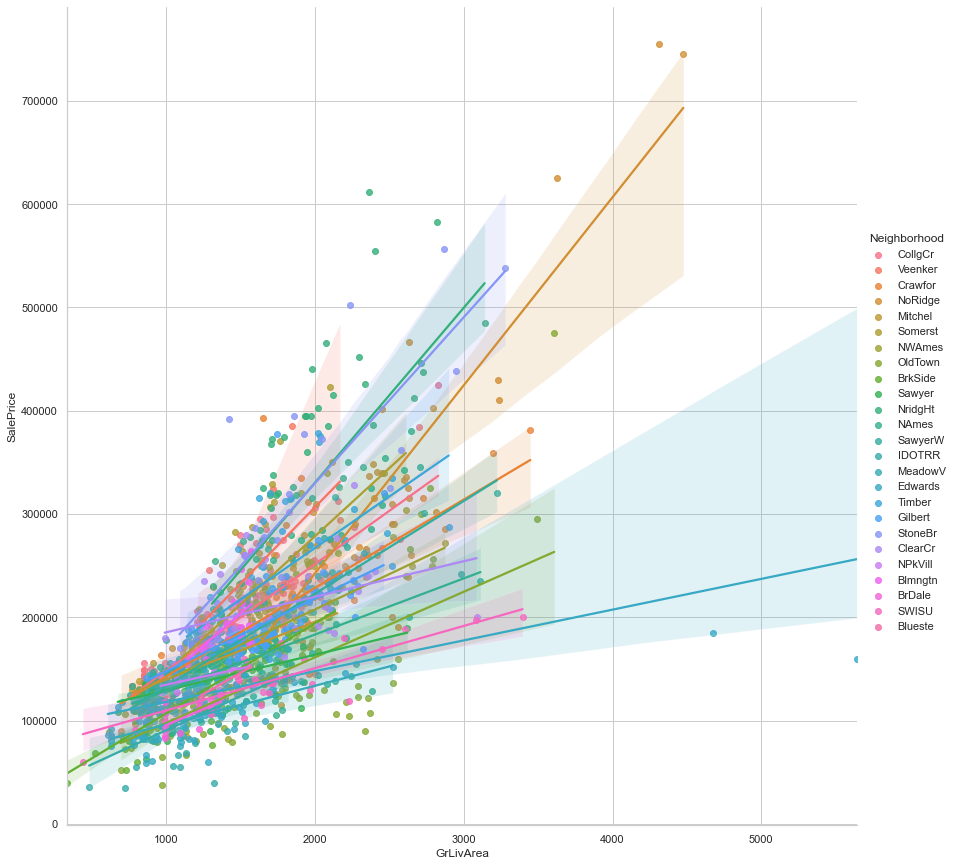

In [110]:
sns.lmplot(x="GrLivArea", y="SalePrice", hue="Neighborhood",
               data=df, height=12, aspect=1)
plt.show();

#But it would be more appropiate to compare areas/prices by neighborhoods.

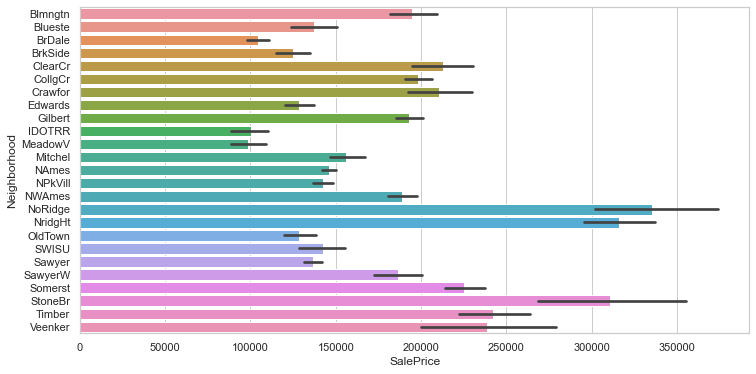

In [139]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

ordered_df = df.sort_values('Neighborhood')
ax = sns.barplot(x=df['SalePrice'], y='Neighborhood', data=ordered_df)
ax.set_xlabel('SalePrice')
plt.show()